In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [88]:
# load dataset
df = pd.read_csv('./dashboard/data/supermarket_clean.csv')

In [89]:
df.sample(5)

,Invoice ID,City,Customer Type,Gender,Product Category,Unit Price,Quantity,Total,Date,Hour,Payment,COGS,GMP,Gross Income,Rating,Rating Range,Hour Range
125,668-90-8900,Yangon,Normal,Female,Home and lifestyle,93.69,7,688.6215,2019-03-10,18,Credit card,655.83,4.761905,32.7915,4.5,3 ~ 5,17 ~ 19
448,296-11-7041,Mandalay,Member,Female,Health and beauty,27.07,1,28.4235,2019-01-12,20,Credit card,27.07,4.761905,1.3535,5.3,5 ~ 7,19 ~ 21
210,888-02-0338,Yangon,Normal,Male,Electronic accessories,26.23,9,247.8735,2019-01-25,20,Ewallet,236.07,4.761905,11.8035,5.9,5 ~ 7,19 ~ 21
284,565-17-3836,Yangon,Member,Female,Health and beauty,47.67,4,200.2140,2019-03-12,14,Cash,190.68,4.761905,9.5340,9.1,9 ~ 10,13 ~ 15
119,378-24-2715,Mandalay,Normal,Male,Home and lifestyle,53.44,2,112.2240,2019-01-20,20,Ewallet,106.88,4.761905,5.3440,4.1,3 ~ 5,19 ~ 21


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Invoice ID        1000 non-null   object 
 1   City              1000 non-null   object 
 2   Customer Type     1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Product Category  1000 non-null   object 
 5   Unit Price        1000 non-null   float64
 6   Quantity          1000 non-null   int64  
 7   Total             1000 non-null   float64
 8   Date              1000 non-null   object 
 9   Hour              1000 non-null   int64  
 10  Payment           1000 non-null   object 
 11  COGS              1000 non-null   float64
 12  GMP               1000 non-null   float64
 13  Gross Income      1000 non-null   float64
 14  Rating            1000 non-null   float64
 15  Rating Range      1000 non-null   object 
 16  Hour Range        1000 non-null   object 
d

In [91]:
df['Date'] = pd.to_datetime(df['Date'])

In [92]:
df_h = df[["Gender", "Total","Date"]]

In [93]:
df_h = df_h.rename(columns = { "Total":"Total Spending" })

In [94]:
df_h.head()

,Gender,Total Spending,Date
0,Female,548.9715,2019-01-05
1,Female,80.2200,2019-03-08
2,Male,340.5255,2019-03-03
3,Male,489.0480,2019-01-27
4,Male,634.3785,2019-02-08


In [95]:
female.head()

,Total Spending
Date,
2019-01-01,447.318375
2019-01-02,312.616500
2019-01-03,253.013250
2019-01-04,430.531500
2019-01-05,311.550167


In [96]:
male.head()

,Total Spending
Date,
2019-01-01,291.658500
2019-01-02,220.045000
2019-01-03,266.518875
2019-01-04,110.698000
2019-01-05,244.244000


### Hypothesis Testing

Hypothesis
α = 0.05

**H0: μ_female = μ_male** -> `Tidak ada` perbedaan yang signifikan antara rata-rata pembelanjaan harian seorang customer laki-laki dan perempuan.

**H1: μ_female = μ_male**  -> `Terdapat` perbedaan yang signifikan antara rata-rata pembelanjaan harian seorang customer laki-laki dan perempuan.

### Distribution

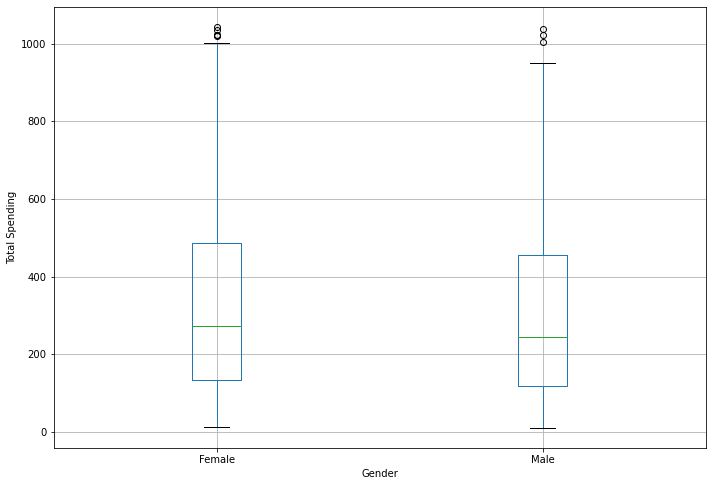

In [97]:
ax = df_h.boxplot(by="Gender", column="Total Spending", figsize=(10, 7))
ax.set_xlabel("Gender")
ax.set_ylabel("Total Spending")
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

### Two Samples Independent Two Tailed Hypothesis Testing
Now, we want to check, whether daily average spending between male and female are significantly different or not using two samples independent two tailed test.

In [98]:
female = df_h[df_h['Gender'] == 'Female' ].groupby(['Date']).mean()
male = df_h[df_h['Gender'] == 'Male' ].groupby(['Date']).mean()

In [99]:
print('Average spending a female in a day: ${}'.format(np.round(female['Total Spending'].mean())))
print('Average sales a male in a day: ${}'.format(np.round(male['Total Spending'].mean())))

Average spending a female in a day: $332.0
Average sales a Germany in a day: $307.0


In [100]:
t_stat, p_val = stats.ttest_ind(female, male)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.14580477598170313
t-statistics: 1.4609767778104268


In [101]:
# confidence interval
ci = stats.norm.interval(0.90, female['Total Spending'].mean(), female['Total Spending'].std())
ci

(148.32277848092485, 515.1897254064801)

In [102]:
female_population = np.random.normal(female['Total Spending'].mean(),female['Total Spending'].std(),10000)
male_population = np.random.normal(male['Total Spending'].mean(),male['Total Spending'].std(),10000)

In [103]:
alternatif_right = female_population.mean()+t_stat[0]*female_population.std()
alternatif_left = female_population.mean()-t_stat[0]*female_population.std()

In [104]:
# Distplot of Attack and Defense
import plotly.graph_objects as go
hist_data = [female_population,male_population]
group_labels = ['Female Population','Male Population']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)


# add line in mean of populations
fig.add_trace(go.Scatter(x=[female['Total Spending'].mean(),female['Total Spending'].mean()], 
                         y=[0,0.004], 
                         mode='lines', 
                         line=dict(color='blue', width=2, dash='dash'),
                         name='Female Average Purchased a Day *Pop'))
fig.add_trace(go.Scatter(x=[male['Total Spending'].mean(),male['Total Spending'].mean()], 
                         y=[0,0.004], 
                         mode='lines', 
                         line=dict(color='red', width=2, dash='dash'),
                         name='Male Average Spending a Day *Pop'))

# add line in alternative hyphothesis
fig.add_trace(go.Scatter(x=[alternatif_right,
                            alternatif_right], 
                         y=[0,0.004], 
                         mode='lines', 
                         line=dict(color='black', width=2, dash='dash'),
                         name = 'Alternative Hypothesis'))

fig.add_trace(go.Scatter(x=[alternatif_left,
                            alternatif_left], 
                         y=[0,0.004], 
                         mode='lines', 
                         line=dict(color='black', width=2, dash='dash'),
                         name = 'Alternative Hypothesis'))

# add line in CI part
fig.add_trace(go.Scatter(x=[ci[1],ci[1]], 
                         y=[0,0.004], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash'),
                         name='Confidence Interval Treshold 90%'))

fig.add_trace(go.Scatter(x=[ci[0],ci[0]], 
                         y=[0,0.004], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash'),
                         name='Confidence Interval Treshold 90%'))


iplot(fig, filename='Distplot of Female and Male population')